# Transfer Function Plot Generation

### **DISCLAIMER: This is not required. You can generate plots however you would like. This notebook is only here to help you.**


You will notice that throughout the homework assignment, you are asked to plot transfer functions. This Jupyter Notebook will help you do just that!

Recall that for any transfer function $H(j\omega)$, the function takes in angular frequencies $\omega \in \mathbb{R}$ and will output a complex number $H(j\omega) \in \mathbb{C}$. For this reason, we need two plots to describe $H(j\omega)$. The first plot is the magnitude $|H(j\omega)|$. The second plot is the phase $\measuredangle H(j\omega)$.

In order to implement this, we have one general function `plot_tf` that will make the plots. See the documentation and example below to use it. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# This function will generate the magnitude (and optionally the phase) 
# of the inputed transfer function. 
# Inputs: 
#     H (function) - The transfer function of interest
#     w_range (length 2 tuple) - The function will plot w in [10 ** w_range[0], 10 ** w_range[1]]
#     phase (boolean) - Default is false, optionally plots the phase response
# Outputs:
#     None, just plots the function.
def plot_tf(H, w_range, phase=False):
    w = np.logspace(w_range[0], w_range[1], num=1000)
    
    plt.grid()
    plt.title('Magnitude Plot: $|H(j\omega)|$')
    plt.xlabel('$\omega$')
    plt.ylabel('$|H(j\omega)|$')
    plt.loglog(w, np.abs(H(w)))
    
    if phase:
        plt.figure()
        plt.grid()
        plt.title('Phase Plot: Phase of $H(j\omega)$')
        plt.xlabel('$\omega$')
        plt.ylabel('$\measuredangle H(j\omega)$')
        plt.semilogx(w, np.angle(H(w)) * 180 / np.pi)

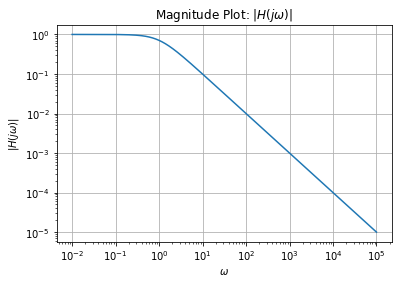

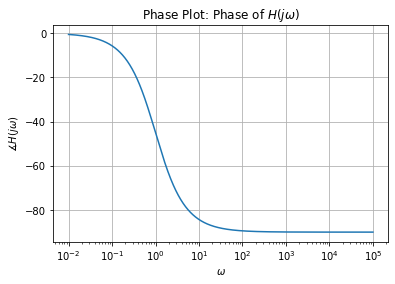

In [7]:
# EXAMPLE: Let's plot w in the range 10 ** -2 to 10 ** 5:

# Define your transfer function
def H_example(w):
    return 1 / (1 + 1j * w)

#Pass in your transfer function and the log range to plot_tf
plot_tf(H_example, (-2, 5), phase=True)

# 3c: Color Organ Filter Design

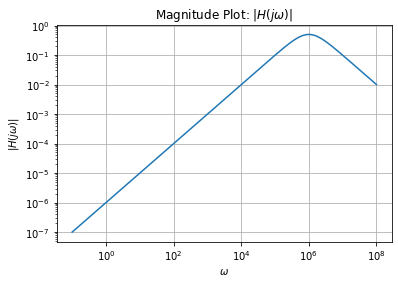

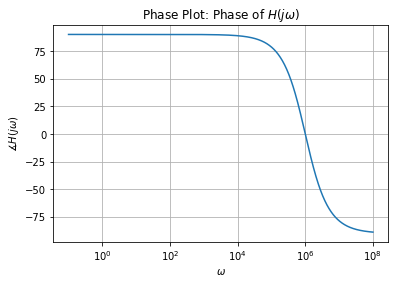

In [8]:
#Define the transfer function from 3c
def H_color_organ(w):
    R_L = 1
    C_L = 1e-6
    R_H = 1
    C_H = 1e-6
    return (1j * w * R_H * C_H) / ((1 + (1j * w * R_L * C_L)) * (1 + (1j * w * R_H * C_H)))

plot_tf(H_color_organ, (-1, 8), phase=True)

In [9]:
# find filter response at w = 1000 rad / s
ans = H_color_organ(1000)
print(f'magnitude is {np.abs(ans):.3e}')
phase = np.angle(ans)
print(f'phase is {phase:.3f} radians = {phase * 180 / np.pi:.1f} degrees')

magnitude is 1.000e-03
phase is 1.569 radians = 89.9 degrees


# 6c: RLC filter

In [10]:
#Define the transfer function from 6c
def H_6c(w, R, L, C):
    return 1 / (1 + 1j * (w * L / R - 1 / (w * R * C)))

**Overdamped**

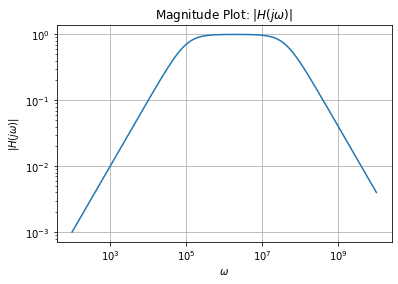

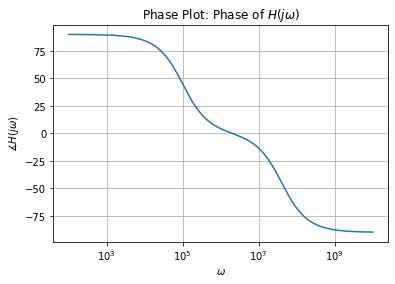

In [11]:
#Define the transfer function from 6c for the OVERDAMPED case
def H_6c_overdamped(w):
    R = 1e3
    L = 25e-6
    C = 10e-9
    return H_6c(w, R, L, C)

plot_tf(H_6c_overdamped, (2, 10), phase=True)

**Underdamped**

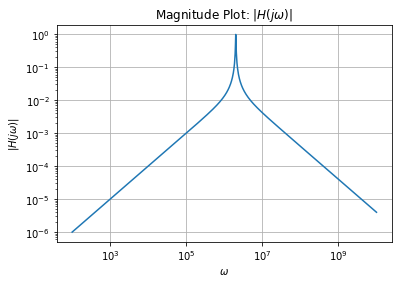

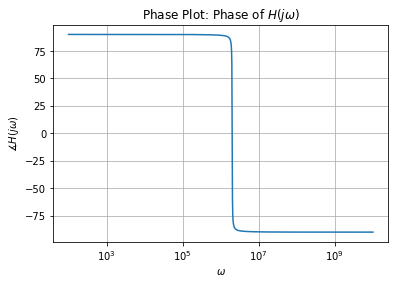

In [12]:
#Define the transfer function from 6c for the UNDERDAMPED case
def H_6c_underdamped(w):
    R = 1
    L = 25e-6
    C = 10e-9
    return H_6c(w, R, L, C)
    

plot_tf(H_6c_underdamped, (2, 10), phase=True)